In [91]:
using CMBLensing, PyPlot, Random, PyCall

In [38]:
Cℓ = camb(ℓmax=100000, r=1e-10);

In [214]:
sim = load_sim(;Nside=(720,1280), pol=:I, beamFWHM=10, μKarcminT=20, T=Float32, θpix=0.25, Cℓ, rng=Xoshiro(2), L=LenseFlow{RK4Solver{40}});

In [138]:
rc("figure", dpi=220)

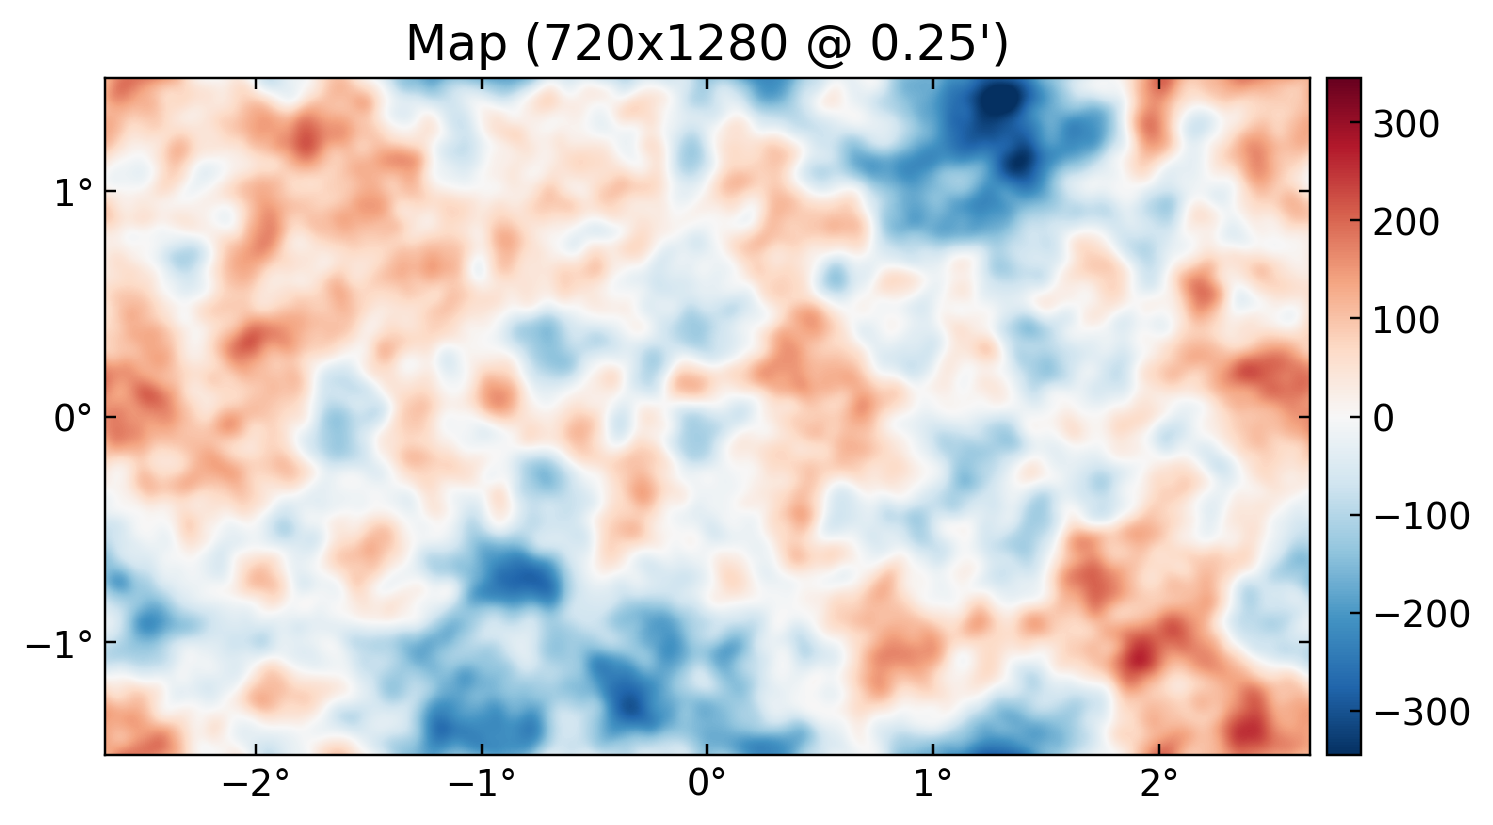

In [197]:
plot(sim.f)

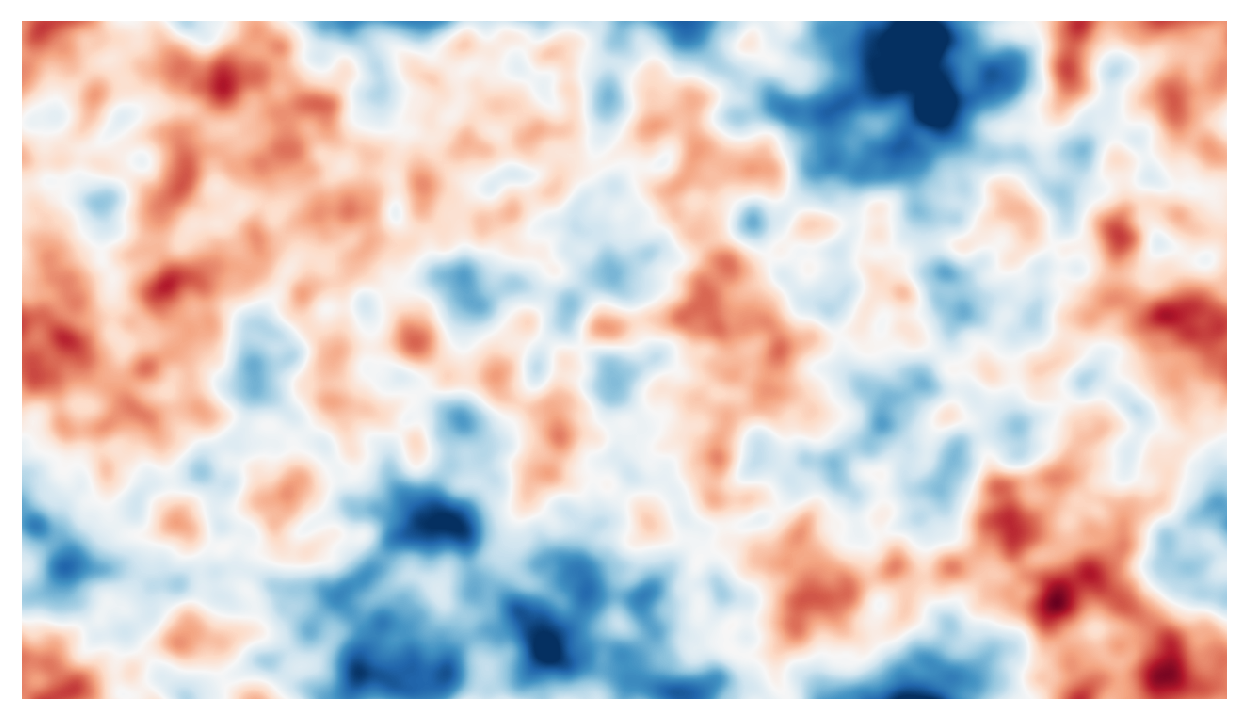

(-2.6666666666666665, 2.6666666666666665, -1.5, 1.5)

In [139]:
plot(sim.f, title="", cbar=false, ticklabels=false, vlim=270)
gca().axis("off")

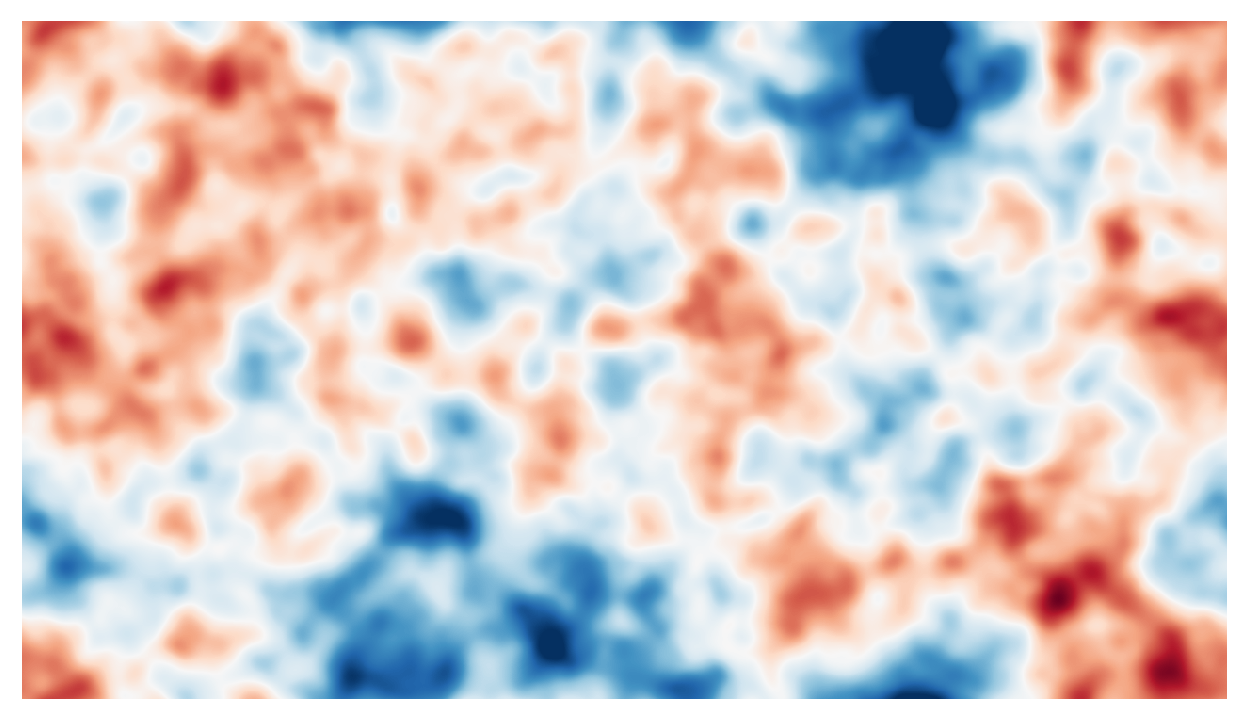

(-2.6666666666666665, 2.6666666666666665, -1.5, 1.5)

In [140]:
plot(sim.f̃, title="", cbar=false, ticklabels=false, vlim=270)
gca().axis("off")

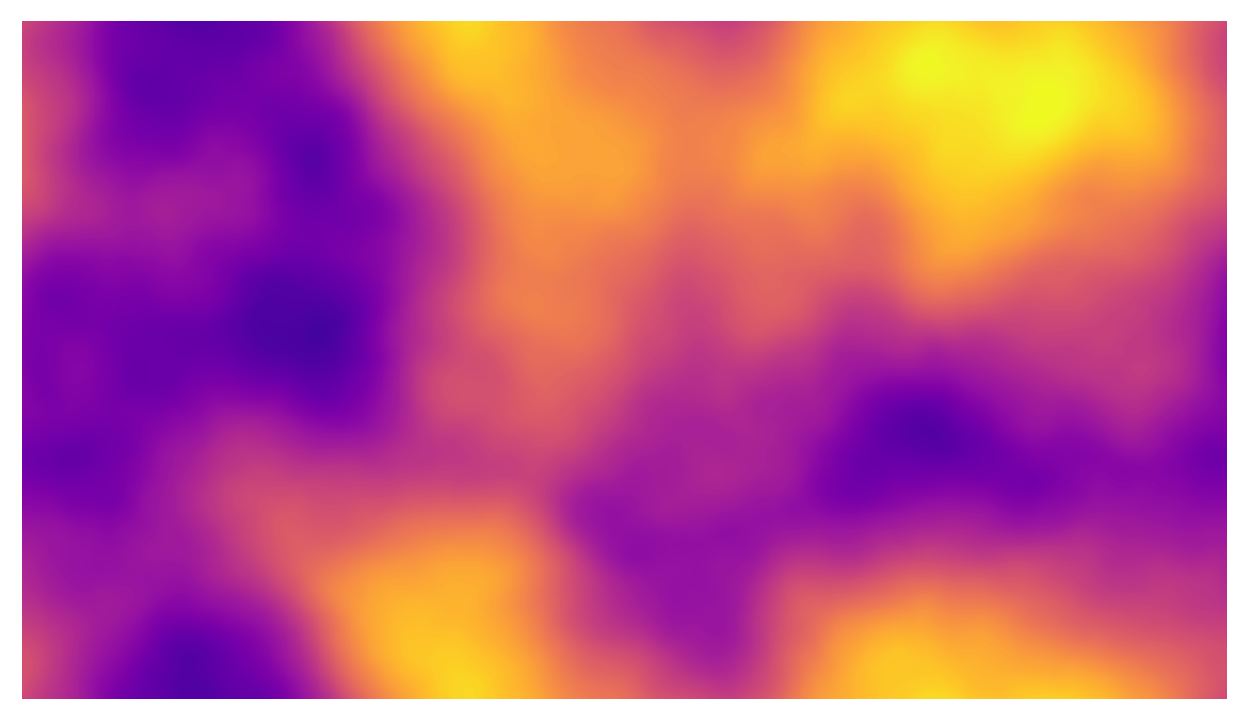

In [170]:
plot(sim.ϕ, title="", cbar=false, ticklabels=false, cmap="plasma")
gca().axis("off")
_xlim = xlim()
_ylim = ylim();

In [193]:
np = pyimport("numpy")
x, y = np.meshgrid(np.linspace(_xlim..., 1280), np.linspace(_ylim..., 720))
u = Matrix(-(∇[1]*sim.ϕ)[:Ix])
v = Matrix((∇[2]*sim.ϕ)[:Ix]);
thin = x-> x[1:25:end, 1:25:end]

#48 (generic function with 1 method)

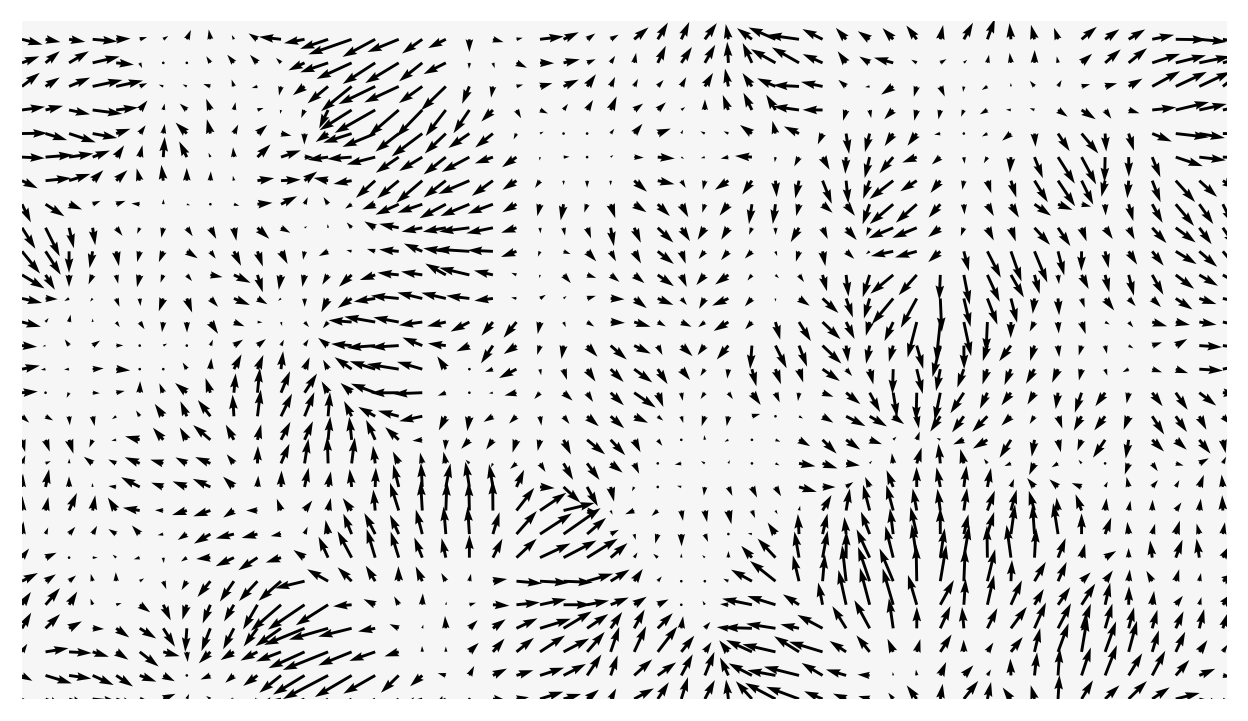

PyObject <matplotlib.quiver.Quiver object at 0x7f1851caa220>

In [194]:
plot(0sim.ϕ, title="", cbar=false, ticklabels=false, vlim=[(-1,1)])
gca().axis("off")
plt.quiver(thin(x), thin(y), thin(u[end:-1:1,:]), thin(v[end:-1:1,:]))

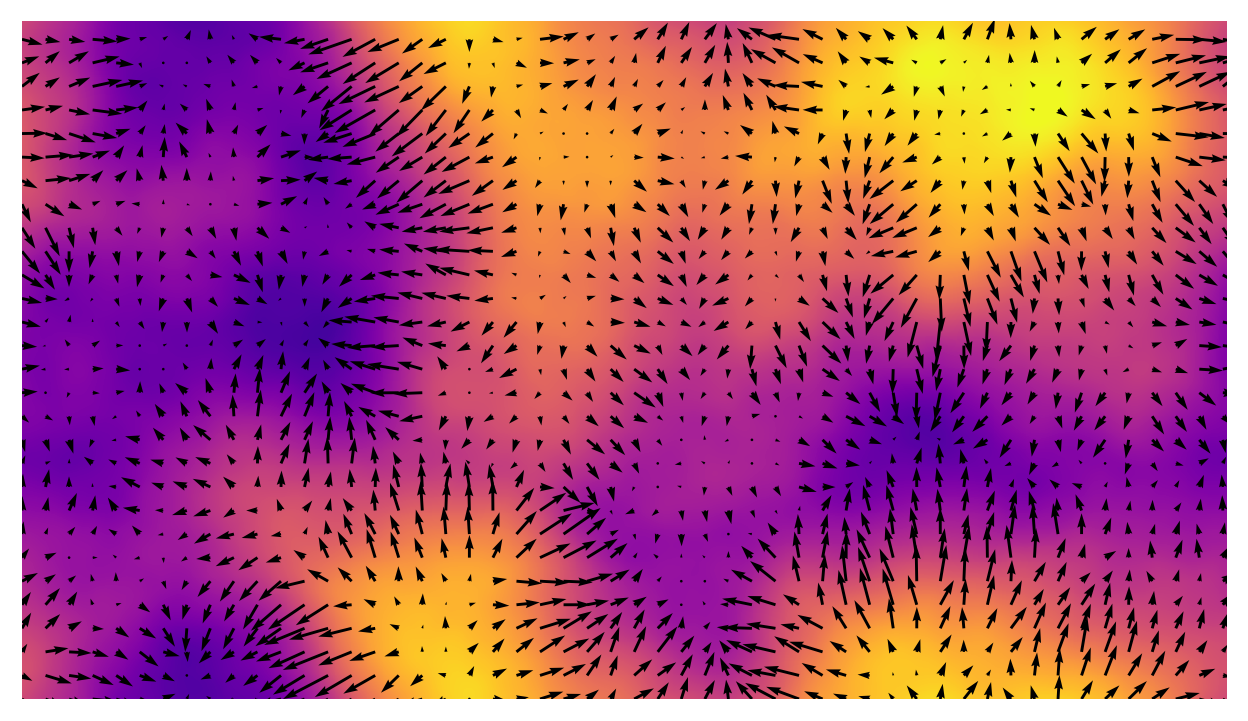

PyObject <matplotlib.quiver.Quiver object at 0x7f1851bc7850>

In [195]:
plot(sim.ϕ, title="", cbar=false, ticklabels=false, cmap="plasma")
gca().axis("off")
plt.quiver(thin(x), thin(y), thin(u[end:-1:1,:]), thin(v[end:-1:1,:]))

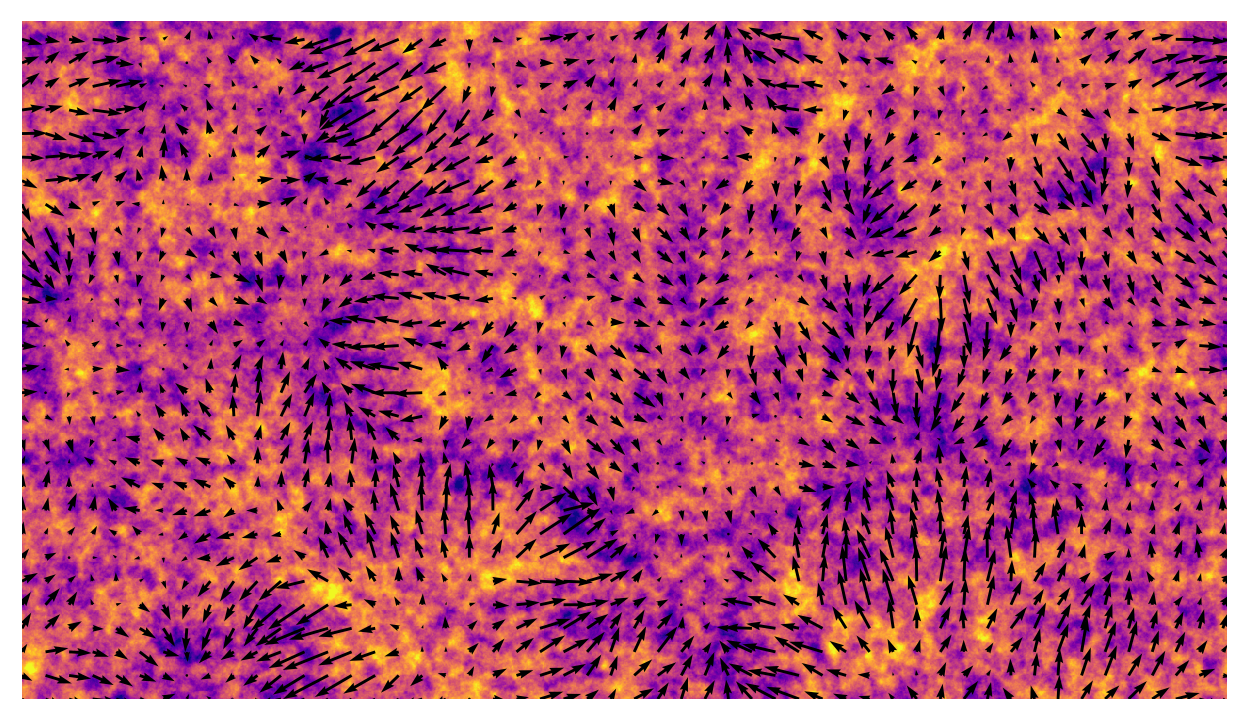

PyObject <matplotlib.quiver.Quiver object at 0x7f185243d040>

In [196]:
plot(∇²*sim.ϕ, title="", cbar=false, ticklabels=false, cmap="plasma")
gca().axis("off")
plt.quiver(thin(x), thin(y), thin(u[end:-1:1,:]), thin(v[end:-1:1,:]))

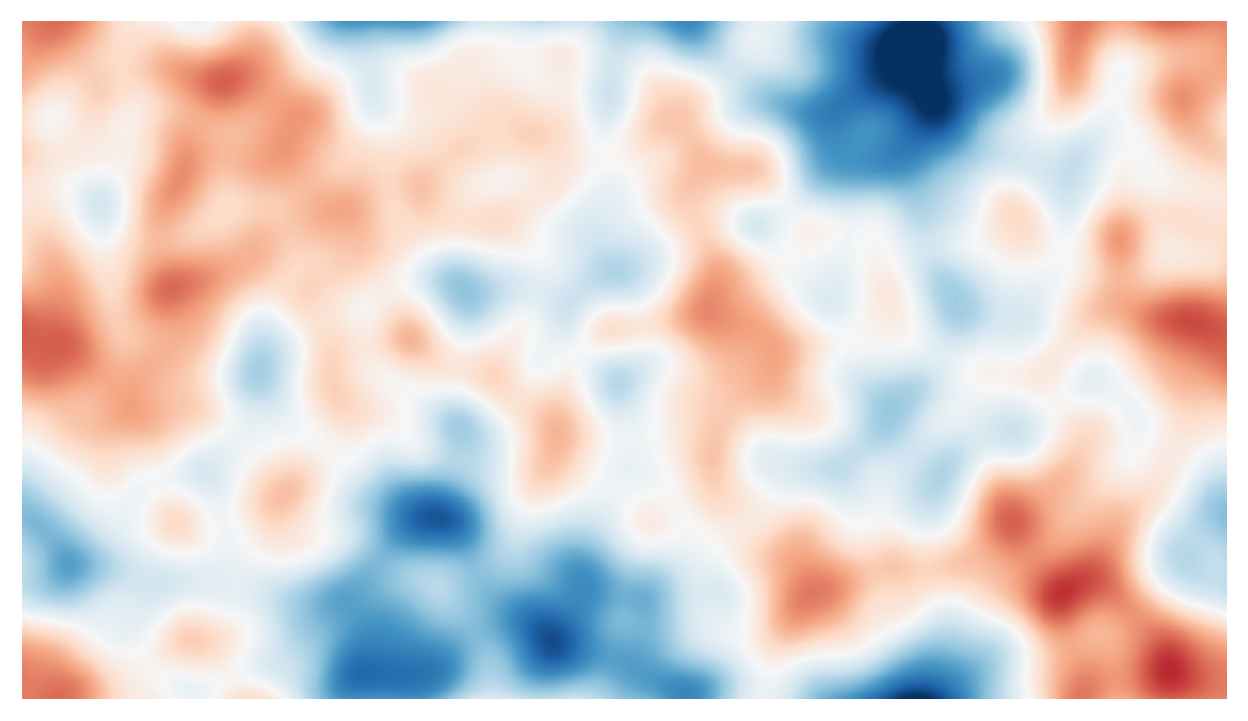

(-2.6666666666666665, 2.6666666666666665, -1.5, 1.5)

In [215]:
plot(sim.ds.B * sim.f̃, title="", cbar=false, ticklabels=false, vlim=270)
gca().axis("off")

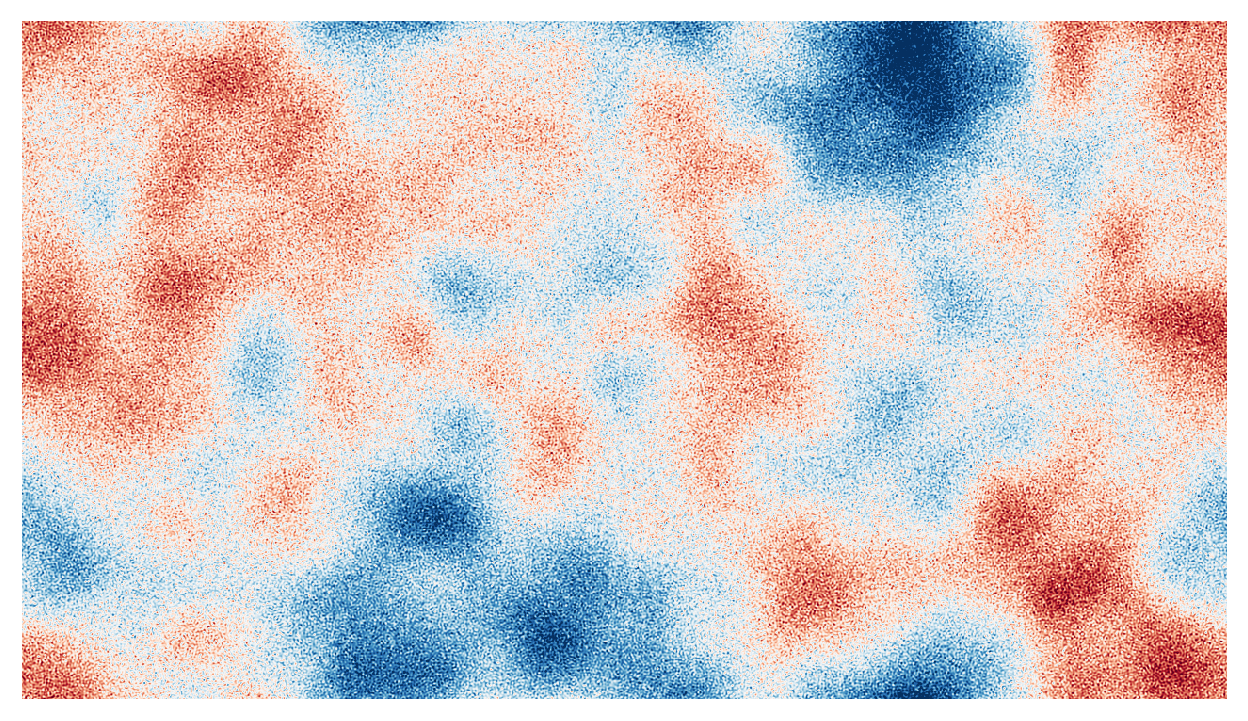

(-2.6666666666666665, 2.6666666666666665, -1.5, 1.5)

In [222]:
plot(sim.ds.B * sim.f̃ + LowPass(30000)*simulate(sim.ds.Cn), title="", cbar=false, ticklabels=false, vlim=270)
gca().axis("off")